# Driving Behavior Modeling

## Dependences

In [14]:
%reset 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## Importing data

In [16]:
A38 = pd.read_csv(r"../data/inputData/aggressive/aggressive_0038.csv")
A38 = A38.drop(['Unnamed: 0'],axis=1)
A39 = pd.read_csv(r"../data/inputData/aggressive/aggressive_0039.csv")
A39 = A39.drop(['Unnamed: 0'],axis=1)
A40 = pd.read_csv(r"../data/inputData/aggressive/aggressive_0040.csv")
A40 = A40.drop(['Unnamed: 0'],axis=1)
A41 = pd.read_csv(r"../data/inputData/aggressive/aggressive_0041.csv")
A41 = A41.drop(['Unnamed: 0'],axis=1)
A42 = pd.read_csv(r"../data/inputData/aggressive/aggressive_0042.csv")
A42 = A42.drop(['Unnamed: 0'],axis=1)
A43 = pd.read_csv(r"../data/inputData/aggressive/aggressive_0043.csv")
A43 = A43.drop(['Unnamed: 0'],axis=1)
A44 = pd.read_csv(r"../data/inputData/aggressive/aggressive_0044.csv")
A44 = A44.drop(['Unnamed: 0'],axis=1)
A45 = pd.read_csv(r"../data/inputData/aggressive/aggressive_0045.csv")
A45 = A45.drop(['Unnamed: 0'],axis=1)
A46 = pd.read_csv(r"../data/inputData/aggressive/aggressive_0046.csv")
A46 = A46.drop(['Unnamed: 0'],axis=1)
A47 = pd.read_csv(r"../data/inputData/aggressive/aggressive_0047.csv")
A47 = A47.drop(['Unnamed: 0'],axis=1)

C16 = pd.read_csv(r"../data/inputData/calm/calm_0016.csv")
C16 = C16.drop(['Unnamed: 0'],axis=1)
C17 = pd.read_csv(r"../data/inputData/calm/calm_0017.csv")
C17 = C17.drop(['Unnamed: 0'],axis=1)
C19 = pd.read_csv(r"../data/inputData/calm/calm_0019.csv")
C19 = C19.drop(['Unnamed: 0'],axis=1)
C20 = pd.read_csv(r"../data/inputData/calm/calm_0020.csv")
C20 = C20.drop(['Unnamed: 0'],axis=1)
C21 = pd.read_csv(r"../data/inputData/calm/calm_0021.csv")
C21 = C21.drop(['Unnamed: 0'],axis=1)
C22 = pd.read_csv(r"../data/inputData/calm/calm_0022.csv")
C22 = C22.drop(['Unnamed: 0'],axis=1)
C23 = pd.read_csv(r"../data/inputData/calm/calm_0023.csv")
C23 = C23.drop(['Unnamed: 0'],axis=1)
C24 = pd.read_csv(r"../data/inputData/calm/calm_0024.csv")
C24 = C24.drop(['Unnamed: 0'],axis=1)
C25 = pd.read_csv(r"../data/inputData/calm/calm_0025.csv")
C25 = C25.drop(['Unnamed: 0'],axis=1)
C26 = pd.read_csv(r"../data/inputData/calm/calm_0026.csv")
C26 = C26.drop(['Unnamed: 0'],axis=1)
C27 = pd.read_csv(r"../data/inputData/calm/calm_0027.csv")
C27 = C27.drop(['Unnamed: 0'],axis=1)

N28 = pd.read_csv(r"../data/inputData/normal/normal_0028.csv")
N28 = N28.drop(['Unnamed: 0'],axis=1)
N29 = pd.read_csv(r"../data/inputData/normal/normal_0029.csv")
N29 = N29.drop(['Unnamed: 0'],axis=1)
N30 = pd.read_csv(r"../data/inputData/normal/normal_0030.csv")
N30 = N30.drop(['Unnamed: 0'],axis=1)
N31 = pd.read_csv(r"../data/inputData/normal/normal_0031.csv")
N31 = N31.drop(['Unnamed: 0'],axis=1)
N32 = pd.read_csv(r"../data/inputData/normal/normal_0032.csv")
N32 = N32.drop(['Unnamed: 0'],axis=1)
N33 = pd.read_csv(r"../data/inputData/normal/normal_0033.csv")
N33 = N33.drop(['Unnamed: 0'],axis=1)
N34 = pd.read_csv(r"../data/inputData/normal/normal_0034.csv")
N34 = N34.drop(['Unnamed: 0'],axis=1)
N35 = pd.read_csv(r"../data/inputData/normal/normal_0035.csv")
N35 = N35.drop(['Unnamed: 0'],axis=1)
N36 = pd.read_csv(r"../data/inputData/normal/normal_0036.csv")
N36 = N36.drop(['Unnamed: 0'],axis=1)
N37 = pd.read_csv(r"../data/inputData/normal/normal_0037.csv")
N37 = N37.drop(['Unnamed: 0'],axis=1)

In [17]:
# Adding column to every data set as indication of labels
# 1 as Calm
C16['Y'] = 1
C17['Y'] = 1
C19['Y'] = 1
C20['Y'] = 1
C21['Y'] = 1
C22['Y'] = 1
C23['Y'] = 1
C24['Y'] = 1
C25['Y'] = 1
C26['Y'] = 1
C27['Y'] = 1

# 2 as Normal
N28['Y'] = 2
N29['Y'] = 2
N30['Y'] = 2
N31['Y'] = 2
N32['Y'] = 2
N33['Y'] = 2
N34['Y'] = 2
N35['Y'] = 2
N36['Y'] = 2
N37['Y'] = 2

# 3 as Aggressive
A38['Y'] = 3
A39['Y'] = 3
A40['Y'] = 3
A41['Y'] = 3
A42['Y'] = 3
A43['Y'] = 3
A44['Y'] = 3
A45['Y'] = 3
A46['Y'] = 3
A47['Y'] = 3

## Euclidean Distance

In [5]:
def euclideanDistance(df):
    """
    This function converts Accel_X, Accel_Y and Accel_Z colmun to an euclidean column as per euclidean Distance formula.
    parma df: Input as DataFrame.
    type df: pandas dataframe
    return df: output as DataFrame including euclidean column.
    type df: pandas dataframe
    """
    D = []
    for i in range(len(df)-1):
        D.append((((df.Accel_X[i+1]- df.Accel_X[i])**2 )+((df.Accel_Y[i+1]- df.Accel_Y[i])**2 )+((df.Accel_Z[i+1]- df.Accel_Z[i])**2 )).round(4))
    D.append(0)
    df['euclidean'] = D
    return df


In [6]:
C16 = euclideanDistance(C16)
C17 = euclideanDistance(C17)
C19 = euclideanDistance(C19)
C20 = euclideanDistance(C20)
C21 = euclideanDistance(C21)
C22 = euclideanDistance(C22)
C23 = euclideanDistance(C23)
C24 = euclideanDistance(C24)
C25 = euclideanDistance(C25)
C26 = euclideanDistance(C26)
C27 = euclideanDistance(C27)

N28 = euclideanDistance(N28)
N29 = euclideanDistance(N29)
N30 = euclideanDistance(N30)
N31 = euclideanDistance(N31)
N32 = euclideanDistance(N32)
N33 = euclideanDistance(N33)
N34 = euclideanDistance(N34)
N35 = euclideanDistance(N35)
N36 = euclideanDistance(N36)
N37 = euclideanDistance(N37)

A38 = euclideanDistance(A38)
A39 = euclideanDistance(A39)
A40 = euclideanDistance(A40)
A41 = euclideanDistance(A41)
A42 = euclideanDistance(A42)
A43 = euclideanDistance(A43)
A44 = euclideanDistance(A44)
A45 = euclideanDistance(A45)
A46 = euclideanDistance(A46)
A47 = euclideanDistance(A47)

## Spliting data set in train and test:

In [7]:
# Separeting Test data set 
testDataSet = pd.concat([C22,C25,N31,N36,A41,A45],axis=0)
# Concatnating all the remaning data set which are used for trainning and validation
dataSet = pd.concat([C16,C17,C19,C20,C21,C23,C24,C26,C27,N28,N29,N30,N32,N33,N34,N35,N37,A38,A39,A40,A42,A43,A44,A46,A47],axis=0)
dataSet.drop(columns=['RealTime'],inplace=True)


In [8]:
dataSet.head(5)

,LineNumber,Accel_X,Accel_Y,Accel_Z,Velocity,Label,Y,euclidean
0,36,0.25,-0.43,0.39,0.0,0,1,0.5330
1,56,0.21,-0.10,-0.26,0.0,0,1,0.1826
2,80,-0.16,0.11,-0.30,0.0,0,1,0.1505
3,100,0.17,-0.09,-0.26,0.0,0,1,0.0406
4,120,0.20,0.10,-0.32,0.0,0,1,0.3779


In [9]:
dataY = dataSet.pop('Y')
dataX = dataSet.copy()
# Treditional train_test_split
xTrain, xVali, yTrain, yVali = train_test_split(dataX,
                                dataY, 
                                test_size=0.2, 
                                random_state=42, 
                                stratify=dataY)

## Model Trainning and Testing

### SVC() 

In [10]:
modelSVC = SVC()
# cross_val_score(modelSVC,xTrain,yTrain,cv=10).mean()

In [11]:
modelSVC.fit(xTrain,yTrain)
predictedSVC = modelSVC.predict(xVali)
print(f"The accuracy score of the SVC model is: {(metrics.accuracy_score(yVali,predictedSVC)*100).round(3)}")

The accuracy score of the SVC model is: 42.98


In [12]:
pC22 = C22.drop(columns=['RealTime','Y'])
pc22 = modelSVC.predict(pC22)
modeC22 = stats.mode(pc22)
pC25 = C25.drop(columns=['RealTime','Y'])
pc25C25 = modelSVC.predict(pC25)
modeC25 = stats.mode(pc25C25)
print(f"Predicted Value of the Calm 0022 is :{modeC22.mode}")
print(f"Predicted Value of the Calm 0025 is :{modeC25.mode}")
pN31 = N31.drop(columns=['RealTime','Y'])
pn31 = modelSVC.predict(pN31)
modeN31 = stats.mode(pn31)
pN36 = N36.drop(columns=['RealTime','Y'])
pn36 = modelSVC.predict(pN36)
modeN36 = stats.mode(pn36)
print(f"Predicted Value of the Normal 0031 is :{modeN31.mode}")
print(f"Predicted Value of the Normal 0036 is :{modeN36.mode}")
pA41 = A41.drop(columns=['RealTime','Y'])
pa41 = modelSVC.predict(pA41)
modeA41 = stats.mode(pa41)
pA45 = A45.drop(columns=['RealTime','Y'])
pa45 = modelSVC.predict(pA45)
modeA45 = stats.mode(pa45)
print(f"Predicted Value of the Aggressive 0041 is :{modeA41.mode}")
print(f"Predicted Value of the Aggressive 0045 is :{modeA45.mode}")

Predicted Value of the Calm 0022 is :[1]
Predicted Value of the Calm 0025 is :[1]
Predicted Value of the Normal 0031 is :[1]
Predicted Value of the Normal 0036 is :[1]
Predicted Value of the Aggressive 0041 is :[1]
Predicted Value of the Aggressive 0045 is :[1]


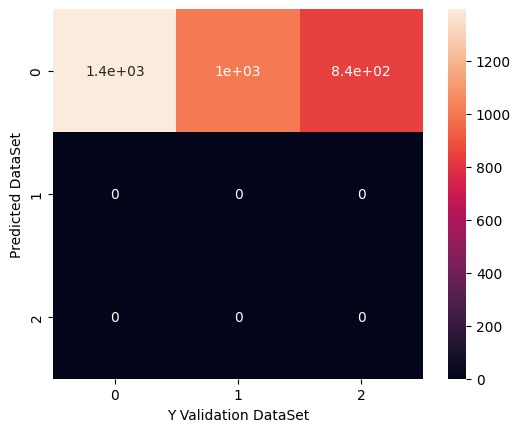

In [13]:
mat = metrics.confusion_matrix(yVali,predictedSVC)
sns.heatmap(mat.T,square=True,annot=True)
plt.xlabel('Y Validation DataSet')
plt.ylabel('Predicted DataSet')
plt.show()

### DecisionTreeClassifier() 

In [14]:
modelTree = DecisionTreeClassifier()
cross_val_score(modelTree,dataX,dataY,cv=10).mean()

0.9203682288773753

In [15]:
modelTree.fit(dataX,dataY)

DecisionTreeClassifier()

In [16]:
predictedTree = modelTree.predict(xVali)
print(f"The accuracy score of the Tree model is: {(metrics.accuracy_score(yVali,predictedTree)*100).round(3)}")

The accuracy score of the Tree model is: 100.0


In [17]:
pC22 = C22.drop(columns=['RealTime','Y'])
pc22 = modelTree.predict(pC22)
modeC22 = stats.mode(pc22)
pC25 = C25.drop(columns=['RealTime','Y'])
pc25C25 = modelTree.predict(pC25)
modeC25 = stats.mode(pc25C25)
print(f"Predicted Value of the Calm 0022 is :{modeC22.mode}")
print(f"Predicted Value of the Calm 0025 is :{modeC25.mode}")
pN31 = N31.drop(columns=['RealTime','Y'])
pn31 = modelTree.predict(pN31)
modeN31 = stats.mode(pn31)
pN36 = N36.drop(columns=['RealTime','Y'])
pn36 = modelTree.predict(pN36)
modeN36 = stats.mode(pn36)
print(f"Predicted Value of the Normal 0031 is :{modeN31.mode}")
print(f"Predicted Value of the Normal 0036 is :{modeN36.mode}")
pA41 = A41.drop(columns=['RealTime','Y'])
pa41 = modelTree.predict(pA41)
modeA41 = stats.mode(pa41)
pA45 = A45.drop(columns=['RealTime','Y'])
pa45 = modelTree.predict(pA45)
modeA45 = stats.mode(pa45)
print(f"Predicted Value of the Aggressive 0041 is :{modeA41.mode}")
print(f"Predicted Value of the Aggressive 0045 is :{modeA45.mode}")

Predicted Value of the Calm 0022 is :[1]
Predicted Value of the Calm 0025 is :[1]
Predicted Value of the Normal 0031 is :[2]
Predicted Value of the Normal 0036 is :[2]
Predicted Value of the Aggressive 0041 is :[3]
Predicted Value of the Aggressive 0045 is :[3]


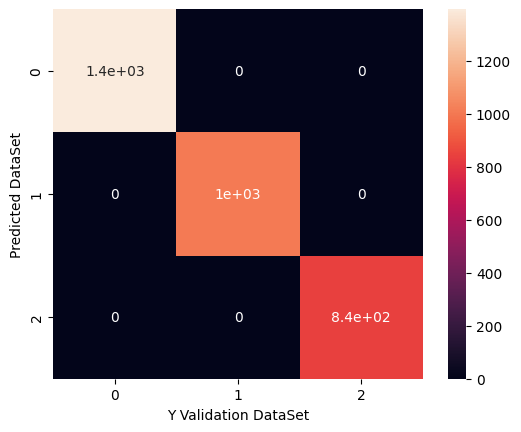

In [18]:
mat = metrics.confusion_matrix(yVali,predictedTree)
sns.heatmap(mat.T,square=True,annot=True)
plt.xlabel('Y Validation DataSet')
plt.ylabel('Predicted DataSet')
plt.show()

### Random forest

In [19]:
modelRandom = RandomForestClassifier(
    n_estimators=100,
    oob_score=True,
    random_state=10
)

In [20]:
cross_val_score(modelRandom,dataX,dataY,cv=10).mean()

0.926158303209103

In [21]:
modelRandom.fit(xTrain,yTrain)

RandomForestClassifier(oob_score=True, random_state=10)

In [22]:
predictedRandom = modelRandom.predict(xVali)
print(f"The accuracy score of the Random model is: {(metrics.accuracy_score(yVali,predictedRandom)*100).round(3)}")

The accuracy score of the Random model is: 97.229


In [23]:
pC22 = C22.drop(columns=['RealTime','Y'])
pc22 = modelRandom.predict(pC22)
modeC22 = stats.mode(pc22)
pC25 = C25.drop(columns=['RealTime','Y'])
pc25C25 = modelRandom.predict(pC25)
modeC25 = stats.mode(pc25C25)
print(f"Predicted Value of the Calm 0022 is :{modeC22.mode}")
print(f"Predicted Value of the Calm 0025 is :{modeC25.mode}")
pN31 = N31.drop(columns=['RealTime','Y'])
pn31 = modelRandom.predict(pN31)
modeN31 = stats.mode(pn31)
pN36 = N36.drop(columns=['RealTime','Y'])
pn36 = modelRandom.predict(pN36)
modeN36 = stats.mode(pn36)
print(f"Predicted Value of the Normal 0031 is :{modeN31.mode}")
print(f"Predicted Value of the Normal 0036 is :{modeN36.mode}")
pA41 = A41.drop(columns=['RealTime','Y'])
pa41 = modelRandom.predict(pA41)
modeA41 = stats.mode(pa41)
pA45 = A45.drop(columns=['RealTime','Y'])
pa45 = modelRandom.predict(pA45)
modeA45 = stats.mode(pa45)
print(f"Predicted Value of the Aggressive 0041 is :{modeA41.mode}")
print(f"Predicted Value of the Aggressive 0045 is :{modeA45.mode}")

Predicted Value of the Calm 0022 is :[1]
Predicted Value of the Calm 0025 is :[1]
Predicted Value of the Normal 0031 is :[2]
Predicted Value of the Normal 0036 is :[2]
Predicted Value of the Aggressive 0041 is :[3]
Predicted Value of the Aggressive 0045 is :[3]


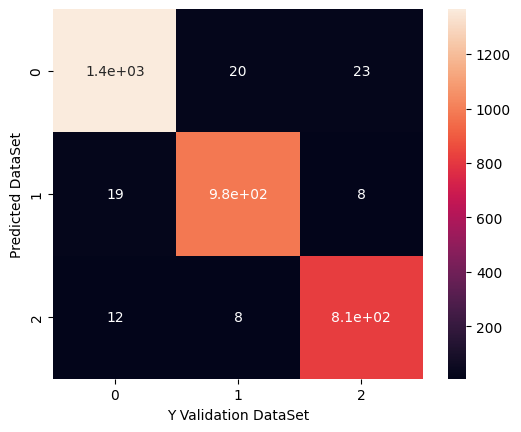

In [24]:
mat = metrics.confusion_matrix(yVali,predictedRandom)
sns.heatmap(mat.T,square=True,annot=True)
plt.xlabel('Y Validation DataSet')
plt.ylabel('Predicted DataSet')
plt.show()

## Comparing all three models.

In [25]:
print(f"Cross Validation Score of SVC : {cross_val_score(modelSVC,xTrain,yTrain,cv=10).mean()}")
print(f"Cross Validation Score of Decission Tree :{cross_val_score(modelTree,dataX,dataY,cv=10).mean()}")
print(f"Cross Validation Score of Random Forest :{cross_val_score(modelRandom,dataX,dataY,cv=10).mean()}")

Cross Validation Score of SVC : 0.42978135367848447
Cross Validation Score of Decission Tree :0.9211069554343503
Cross Validation Score of Random Forest :0.926158303209103


In [26]:
print(f"The accuracy score of the SVC model is: {(metrics.accuracy_score(yVali,predictedSVC)*100).round(3)}")
print(f"The accuracy score of the Tree model is: {(metrics.accuracy_score(yVali,predictedTree)*100).round(3)}")
print(f"The accuracy score of the Random model is: {(metrics.accuracy_score(yVali,predictedRandom)*100).round(3)}")

The accuracy score of the SVC model is: 42.98
The accuracy score of the Tree model is: 100.0
The accuracy score of the Random model is: 97.229


In [36]:
print(f"The precision score of the SVC model is: {(metrics.precision_score(yVali,predictedSVC,average='weighted')*100).round(3)}")
print(f"The precision score of the Tree model is: {(metrics.precision_score(yVali,predictedTree,average='weighted')*100).round(3)}")
print(f"The precision score of the Random model is: {(metrics.precision_score(yVali,predictedRandom,average='weighted')*100).round(3)}")

The precision score of the SVC model is: 18.473
The precision score of the Tree model is: 100.0
The precision score of the Random model is: 97.231


In [37]:
print(f"The recall score of the SVC model is: {(metrics.recall_score(yVali,predictedSVC,average='weighted')*100).round(3)}")
print(f"The recall score of the Tree model is: {(metrics.recall_score(yVali,predictedTree,average='weighted')*100).round(3)}")
print(f"The recall score of the Random model is: {(metrics.recall_score(yVali,predictedRandom,average='weighted')*100).round(3)}")

The recall score of the SVC model is: 42.98
The recall score of the Tree model is: 100.0
The recall score of the Random model is: 97.229


In [39]:
print(f"The f1 score of the SVC model is: {(metrics.f1_score(yVali,predictedSVC,average='weighted')*100).round(3)}")
print(f"The f1 score of the Tree model is: {(metrics.f1_score(yVali,predictedTree,average='weighted')*100).round(3)}")
print(f"The f1 score of the Random model is: {(metrics.f1_score(yVali,predictedRandom,average='weighted')*100).round(3)}")

The f1 score of the SVC model is: 25.84
The f1 score of the Tree model is: 100.0
The f1 score of the Random model is: 97.228
